<a href="https://colab.research.google.com/github/Nidarshan619/Planets/blob/master/Shreya_PMU_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# R0


In [ ]:
import pandas as pd
pmu_path = "/content/gdrive/MyDrive/Shreya_PMU/Shreya_PMU.csv"
pmu_df = pd.read_csv('/content/gdrive/MyDrive/Shreya_PMU/Shreya_PMU.csv')


In [ ]:
pmu_df.columns

Index(['Va_mag', 'Vb_mag', 'Vc_mag', 'Ia_mag', 'Ib_mag', 'Ic_mag', 'V1_mag',
       'I1_mag', 'V2_mag', 'V0_mag', 'I0_mag', 'I2_mag', 'Va_ang', 'Vb_ang',
       'Vc_ang', 'Ia_ang', 'Ib_ang', 'Ic_ang', 'V1_ang', 'I1_ang', 'V2_ang',
       'V0_ang', 'I0_ang', 'I2_ang', 'Freq', 'ROCOF', 'Events'],
      dtype='object')

In [ ]:
#To generate a book-keeping scheme. 
def diffe(df):
    df["diff"] = df['Events'].diff()     # Raise a non-zero number where the new event is seen
    df.loc[pd.isnull(df["diff"]),"diff"] = 0  # Locate the places where 0 is present
    df["Indexing"] = np.array(range(1,df.shape[0]+1)) # Create a new index of the shape as that of dataframe
    indices = list(df.loc[df["diff"]!=0,"Indexing"]) # create a list [] containing location of diffs that are not equal to 0 
    indices.insert(0,1)
    indices.insert(len(indices),df.shape[0])
    return indices,df

In [ ]:
liss = list(range(5))
print(liss)
liss.insert(0,7)
liss

[0, 1, 2, 3, 4]


[7, 0, 1, 2, 3, 4]

In [ ]:
pmu_df.shape
df.loc

(2184852, 27)

In [ ]:
pmu_ev = pmu_df.loc[pmu_df['Events']!=0]  # Events data
pmu_nor = pmu_df.loc[pmu_df['Events']==0]  # Normal Data
pmu_ev['Events'].unique()                # Check the events data
#indices,df_lr = diffe(pmu_ev)             # fuchtion
pmu_ev.head()
a = pmu_ev['Events'].diff()
#df.loc[pd.isnull(df["diff"]),"diff"] = 0
pd.isnull(a)
a.loc()
b = np.array(range(1,len(pmu_df)+1))
b
#indices = list(range(5),"Indexing")
pmu_df.loc[a!=0]


IndexingError: ignored

In [ ]:
pmu_df.head(10)
import csv
Features_list = next(csv.reader(open(pmu_path), delimiter=' '))
Features_list

['Va_mag,Vb_mag,Vc_mag,Ia_mag,Ib_mag,Ic_mag,V1_mag,I1_mag,V2_mag,V0_mag,I0_mag,I2_mag,Va_ang,Vb_ang,Vc_ang,Ia_ang,Ib_ang,Ic_ang,V1_ang,I1_ang,V2_ang,V0_ang,I0_ang,I2_ang,Freq,ROCOF,Events']

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pmu_np = pmu_df.to_numpy()
pmu = torch.from_numpy(pmu_np)

NameError: ignored

In [ ]:
healthy =  0
class_names = ['Normal','Load_on','Load_off','Gen_trip','Line_trip','Cap_on','Cap_off','3_ph_fault','1LG_Fault','2Ph_G_Fault']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


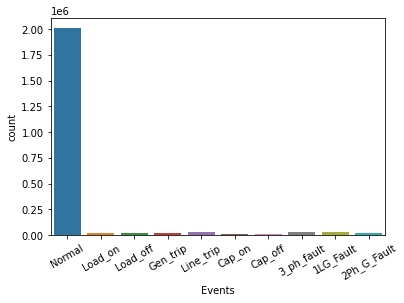

In [ ]:
Signals = list(pmu_df.columns)
pmu_df['Events'].value_counts()
import seaborn as sns
bar_plt = sns.countplot(pmu_df['Events'])
bar_plt.set_xticklabels(class_names,rotation=30);

In [ ]:
def plot_time_series_class(data,class_name, ax, n_steps=2 ):
  time_series_df = pd.DataFrame(data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2*time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0] 
  over_line = (smooth_path + path_deviation)[0] 

  ax.plot(time_series_df, linewidth=2)
  ax.fill_between(
      path_deviation.index,
      under_line,
      over_line,
      alpha= 0.125
  )

  ax.set_title(class_name)

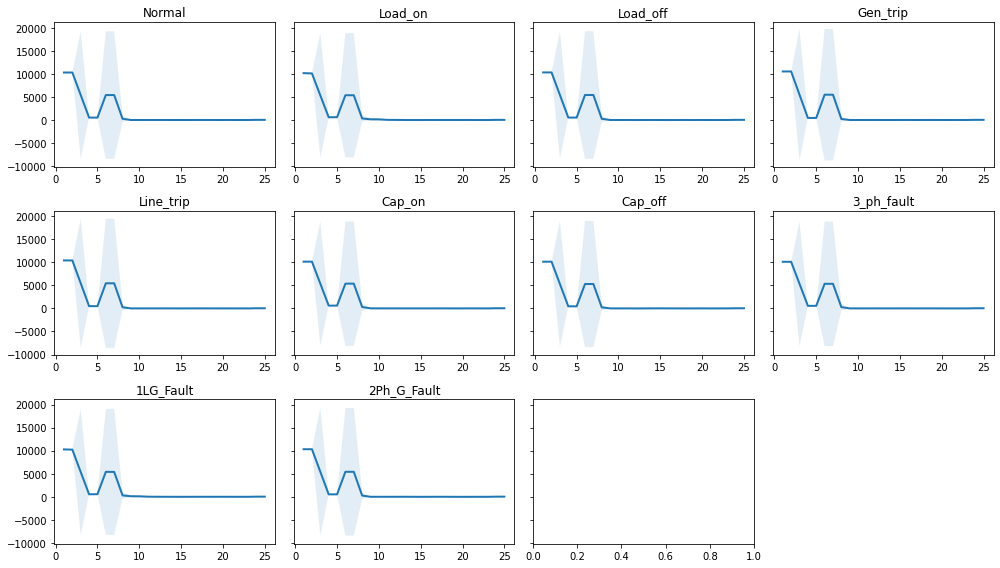

In [ ]:
classes = pmu_df['Events'].unique()
from matplotlib import pyplot as plt
fig,axs = plt.subplots(
    nrows=len(classes)//4 + 1,
    ncols = 4,
    sharey=True,
    figsize=(14, 8)
)

for i,cls in enumerate(classes):
  data = pmu_df[pmu_df['Events'] == cls].drop(labels='Events',axis=1).mean(axis=0).to_numpy()
  ax = axs.flat[i]
  plot_time_series_class(data, class_names[i], ax)
fig.delaxes(axs.flat[-1])
fig.tight_layout();

# R1

In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/Shreya_PMU/Shreya_R1.csv')

In [ ]:
df['Events'].value_counts() # How many events are there
df.loc[1500:2500,['Events','Freq']]
df.index

RangeIndex(start=0, stop=2184852, step=1)

Experiment_to_set Events as index and sort 

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Shreya_PMU/Shreya_R1.csv',index_col='Events')
df.head()
df.sort_index(ascending=False)


/usr/local/lib/python3.7/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Va_mag,Vb_mag,Vc_mag,Ia_mag,Ib_mag,Ic_mag,V1_mag,I1_mag,V2_mag,V0_mag,I0_mag,I2_mag,Va_ang,Vb_ang,Vc_ang,Ia_ang,Ib_ang,Ic_ang,V1_ang,I1_ang,V2_ang,V0_ang,I0_ang,I2_ang,Freq,ROCOF
Events,,,,,,,,,,,,,,,,,,,,,,,,,,
9,10442.500977,10442.442383,10442.550781,508.632416,508.607941,508.604279,10442.498047,508.614868,0.063056,0.000402,0.000268,0.017576,147.023407,27.023907,-92.976059,-47.313530,-167.315582,72.687805,147.023758,-47.313770,60.119968,-60.848789,-50.373337,-40.437401,60.035999,0.0
9,10275.310547,10275.324219,10275.306641,520.972168,520.973022,520.970398,10275.313477,520.971863,0.010359,0.001134,0.000217,0.001549,123.097084,3.097015,-116.903015,-74.746056,165.253677,45.253708,123.097031,-74.746223,-130.134750,179.741104,-63.874432,7.452332,60.009998,0.0
9,10479.515625,10479.511719,10479.395508,504.439484,504.472351,504.470398,10479.474609,504.460754,0.079643,0.001090,0.000188,0.021349,-124.260864,115.738373,-4.261240,42.905235,-77.092857,162.902939,-124.261246,42.905106,-65.359962,-28.187378,34.753284,-140.128723,60.016998,0.0
9,10479.488281,10479.537109,10479.400391,504.438110,504.473145,504.471283,10479.475586,504.460846,0.079450,0.000924,0.000183,0.022803,-124.360382,115.638916,-4.360970,42.805664,-77.192268,162.803223,-124.360817,42.805542,-43.681549,-31.429365,34.687206,-139.861694,60.016998,0.0
9,10479.496094,10479.508789,10479.429688,504.439209,504.471954,504.472290,10479.478516,504.461151,0.049771,0.000500,0.000195,0.021968,-124.460129,115.539398,-4.460420,42.705948,-77.291847,162.703827,-124.460373,42.705975,-56.465858,-23.200512,32.011002,-136.702087,60.016998,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,10414.342773,10414.375977,10414.361328,476.623413,476.622925,476.623962,10414.361328,476.623474,0.019187,0.000577,0.000224,0.000596,-15.617258,-135.617249,104.382584,144.904373,24.904493,-95.095535,-15.617306,144.904449,138.056900,29.531330,146.694229,48.969078,60.076000,0.0
0,10414.353516,10414.337891,10414.368164,476.624756,476.621887,476.623657,10414.352539,476.623474,0.016900,0.000637,0.000235,0.001599,-16.071114,-136.070969,103.929024,144.450592,24.450657,-95.549103,-16.071024,144.450714,-104.281891,38.083244,147.854614,105.100914,60.076000,0.0
0,10414.367188,10414.356445,10414.334961,476.624695,476.623474,476.622772,10414.353516,476.623657,0.018958,0.000926,0.000243,0.001047,-16.524633,-136.524811,103.475327,143.997070,23.996904,-96.002914,-16.524704,143.997025,25.054680,44.882469,147.849487,166.337677,60.076000,0.0


,Va_mag,Vb_mag,Vc_mag,Ia_mag,Ib_mag,Ic_mag,V1_mag,I1_mag,V2_mag,V0_mag,I0_mag,I2_mag,Va_ang,Vb_ang,Vc_ang,Ia_ang,Ib_ang,Ic_ang,V1_ang,I1_ang,V2_ang,V0_ang,I0_ang,I2_ang,Freq,ROCOF
Events,,,,,,,,,,,,,,,,,,,,,,,,,,
0,10444.051758,10444.073242,10444.112305,488.900208,488.887451,488.900299,10444.078125,488.895996,0.035766,0.000373,0.000214,0.008529,115.640388,-4.359292,-124.359566,-78.475288,161.525620,41.526436,115.640511,-78.474411,-25.801832,-124.194229,-87.766777,-139.425491,60.030998,0.0
0,10444.051758,10444.112305,10444.096680,488.899231,488.888947,488.899811,10444.086914,488.896027,0.036575,0.000432,0.000234,0.007070,115.825676,-4.174230,-124.174561,-78.290047,161.710754,41.711380,115.825607,-78.289299,-78.812187,-154.322983,-83.760620,-141.507370,60.030998,0.0
0,10444.081055,10444.088867,10444.091797,488.900452,488.888031,488.898621,10444.086914,488.895691,0.006853,0.000555,0.000223,0.007736,116.010735,-3.989226,-123.989288,-78.104912,161.895706,41.896637,116.010735,-78.104195,-50.817806,-172.202057,-87.328232,-130.727600,60.030998,0.0
0,10444.062500,10444.084961,10444.123047,488.899780,488.887054,488.899841,10444.089844,488.895569,0.035143,0.000340,0.000248,0.008475,116.195724,-3.803962,-123.804230,-77.919952,162.080933,42.081760,116.195847,-77.919083,-25.983152,-159.146774,-86.780655,-138.735321,60.030998,0.0
0,10444.065430,10444.123047,10444.109375,488.898834,488.888580,488.899323,10444.098633,488.895569,0.035204,0.000419,0.000230,0.006972,116.380997,-3.618906,-123.619225,-77.734711,162.266068,42.266701,116.380959,-77.733978,-77.819450,-164.235840,-89.202782,-140.654877,60.030998,0.0


In [ ]:
Signals = list(pmu_df.columns)
pmu_df['Events'].value_counts()
import seaborn as sns
bar_plt = sns.countplot(pmu_df['Events'])
bar_plt.set_xticklabels(class_names,rotation=30);

In [ ]:
import numpy as np

In [ ]:
df["diff"] = df['Events'].diff()
df["diff"].unique()
df.loc[pd.isnull(df["diff"]),"diff"] = 0 # loc has rows 
df["Indexing"] = np.array(range(1,df.shape[0]+1))
type(df["Indexing"])
df["Indexing"]  
df['diff'].value_counts() 
indices = list(df.loc[df['diff']!=0,"Indexing"])   # Place where there is a new calss updated
indices.insert(0,1)
indices[0:5]
len(indices)
indices[3410]
indices.insert(len(indices),df.shape[0])
indices[0:10]
df.loc[1175:1179,'Events']

1175    0
1176    9
1177    9
1178    9
1179    9
Name: Events, dtype: int64

# R2

In [12]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/gdrive/MyDrive/Shreya_PMU/Shreya_R1.csv')

In [13]:
df_events = df.loc[df['Events']!=0]
df_non_ev = df.loc[df['Events'] ==0]

In [14]:
#To generate a book-keeping scheme. 
def diffe(df):
    df["diff"] = df.Events.diff()
    df.loc[pd.isnull(df["diff"]),"diff"] = 0   # This is just to remove nan generated from the previous step
    df["Indexing"] = np.array(range(1,df.shape[0]+1))  # Just created a false indexing starting from 1 and running till the end
    indices = list(df.loc[df["diff"]!=0,"Indexing"])  #create a list [] containing location of diffs that are not equal to 0 
    indices.insert(0,1) # included 1 at the fist change
    indices.insert(len(indices),df.shape[0]) # I dont understand why this is needed
    return indices,df

In [15]:
indices,df_events = diffe(df_events)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [47]:
import torch
import matplotlib.pyplot as plt


In [86]:
def norm(data):
  ev_norm = [(d/d[0])-1 for d in data[:-1]]
  norm_evnts = torch.cat((torch.tensor(ev_norm),torch.tensor(data[-1]).unsqueeze(0)),dim=0)
  return norm_evnts

In [89]:
def data_for_loader(df,indices):
    data_df = pd.DataFrame()
    instances = []
    #df_t = torch.zeros(len(indices),88,26)
    for i in range(1,len(indices)):
      temp = df.loc[(df.Indexing>=indices[i-1])&(df.Indexing<indices[i])]  # And opertation True * True = Ture
      t_events = torch.from_numpy(temp.Events.unique()-1)
      temp = temp.drop(["Events","diff","Indexing"],1)
      temp = temp.iloc[0:88].astype(float)
      temp = temp.to_numpy()
      temp = torch.from_numpy(temp).transpose_(1,0)
      #temp = norm(temp)
      print(temp.shape)
      instance = (temp,t_events)
      instances.append(instance)
    return instances


In [103]:
x = torch.rand(26,88)
xx = [(d/d[0])-1 for d in x[:-1]]
torch.FloatTensor(xx)

ValueError: ignored

In [ ]:
instances = data_for_loader(df_events,indices)


In [72]:
x,_ = instances[0]
x

tensor(198467.0863, dtype=torch.float64)

In [60]:
from torch.utils.data import random_split
trainset, valset = random_split(instances, [1000,550], generator=torch.Generator().manual_seed(123))

In [61]:
labels = [i[1] for i in valset]
torch.tensor(labels).unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [64]:
train_loader = torch.utils.data.DataLoader(trainset, batch_size=50,
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(valset, batch_size=50,
                                           shuffle=True)

In [ ]:
import torch.nn as nn
import torch.optim as optim


model = nn.Sequential(
            nn.Linear(2288, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 9))

            

learning_rate = 1e-5

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 1000

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1).float())
        labels = labels.squeeze(1) # This step should be removed
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

# Plotting the PMU Events

In [164]:
def converter(df,indices):
    data_df = pd.DataFrame()
    pmu_events = torch.tensor(())
    labels = torch.tensor(())
    #df_t = torch.zeros(len(indices),88,26)
    for i in range(1,len(indices)):
      temp = df.loc[(df.Indexing>=indices[i-1])&(df.Indexing<indices[i])]  # And opertation True * True = Ture
      t_events = torch.from_numpy(temp.Events.unique()).unsqueeze(0)
      temp = temp.drop(["Events","diff","Indexing"],1)
      temp = temp.iloc[0:88]
      temp = temp.to_numpy()
      temp = torch.from_numpy(temp).unsqueeze(0)
      #print(temp.shape)
      pmu_events = torch.cat((pmu_events,temp),dim=0)
      labels = torch.cat((labels,t_events), dim=0)
    pmu_events.transpose_(1,2)
    labels.squeeze_()
    print(type(t_events))
    return pmu_events,labels

In [165]:
pmu_events,labels = converter(df_events,indices)
pmu_events.shape, labels.shape

<class 'torch.Tensor'>


(torch.Size([1550, 26, 88]), torch.Size([1550]))

In [166]:
import matplotlib.pyplot as plt
labels_vars = labels.unique()
labels_vars

tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [31]:
healthy =  0
class_names = ['Load_on','Load_off','Gen_trip','Line_trip','Cap_on','Cap_off','3_ph_fault','1LG_Fault','2Ph_G_Fault']
signals = list(df.columns)
print(signals)
signals[25]


['Va_mag', 'Vb_mag', 'Vc_mag', 'Ia_mag', 'Ib_mag', 'Ic_mag', 'V1_mag', 'I1_mag', 'V2_mag', 'V0_mag', 'I0_mag', 'I2_mag', 'Va_ang', 'Vb_ang', 'Vc_ang', 'Ia_ang', 'Ib_ang', 'Ic_ang', 'V1_ang', 'I1_ang', 'V2_ang', 'V0_ang', 'I0_ang', 'I2_ang', 'Freq', 'ROCOF', 'Events']


'ROCOF'

In [168]:
#@title Default title text
def plot_time_series_class(data, signal_name, class_name, ax, n_steps=5):
  i = signals.index(signal_name)
  sig_data = data[i]
  time_series_df = pd.DataFrame(sig_data)

  smooth_path = time_series_df.rolling(n_steps).mean()
  path_deviation = 2 * time_series_df.rolling(n_steps).std()

  under_line = (smooth_path - path_deviation)[0]
  over_line = (smooth_path + path_deviation)[0]

  ax.plot(time_series_df, linewidth=2) #instead of smooth_path
  ax.fill_between(
    path_deviation.index,
    under_line,
    over_line,
    alpha=.125
  )
  ax.set_title(class_name)
  ax.set_ylabel(signals[i])
  ax.set_xlabel('Samples')
  #ax.yaxis(signals[i])
  #ax.xaxis('Samples')

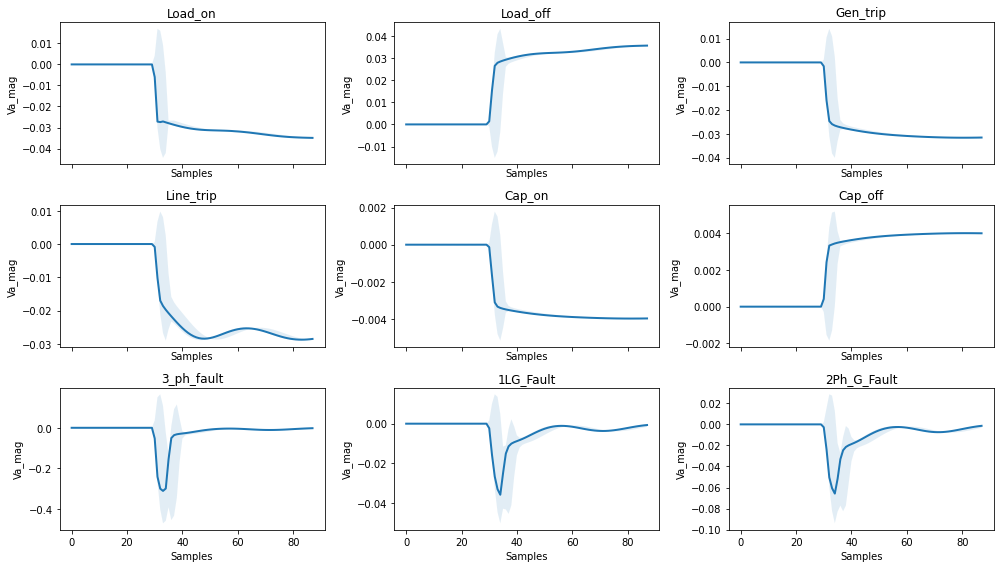

In [171]:
fig, axs = plt.subplots(
  nrows=len(labels_vars) // 3 ,
  ncols=3,
  sharex=True,
  figsize=(14, 8)
)

def norm_plt(data):
  ev_norm = [(d/d[0])-1 for d in data[:-1]]
  norm_evnts = torch.cat((torch.tensor(ev_norm),torch.tensor(data[-1]).unsqueeze(0)),dim=0).numpy()
  return norm_evnts

for i, cls in enumerate(labels_vars):
  ax = axs.flat[i]
  data = pmu_events[labels == cls] \
    .numpy() \
    .mean(axis=0)
  data=norm_plt(data)  # This function carefully 
  plot_time_series_class(data,'Va_mag', class_names[i], ax)  # you can change from 0 to 25 to get various plots

#fig.delaxes(axs.flat[-1])
fig.tight_layout();


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


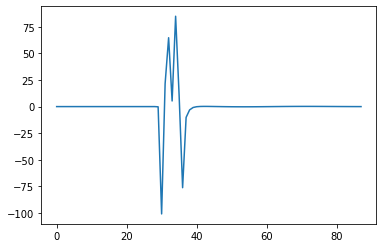

In [ ]:
ev_norm.shape
torch.tensor(data[-1]).unsqueeze(0).shape
data.shape
plt.plot(data[25])

In [ ]:
a = [torch.FloatTensor([1]).view(1, -1), torch.FloatTensor([2]).view(1, -1)]
torch.stack(a)

tensor([[[1.]],

        [[2.]]])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


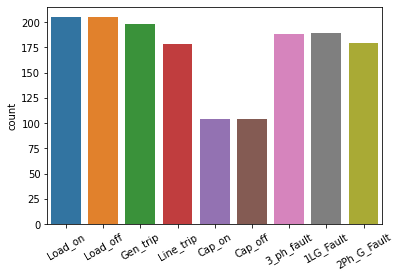

In [ ]:
import seaborn as sns
x = sns.countplot(labels.numpy())
x.set_xticklabels(class_names,rotation=30);

# Experimentation

In [ ]:
mini = (df_events['Indexing']>=indices[0]) 
maxi = (df_events['Indexing']<indices[1])

temp = df_events.loc[(df_events['Indexing']>=indices[0]) & (df_events['Indexing']<indices[1])]
temp.shape
t_events = temp['Events'].unique()
temp = temp.drop(["Events","diff","Indexing"],1)
temp = temp.iloc[0:88]
print(temp.shape)
temp_event = []
temp_event.extend(t_events)
temp

In [ ]:
x = [1, 2, 3]
x.extend([4, 5])
print(x)

In [ ]:

x = [1, 2, 3]
x.append([4, 5])
print(x)


[1, 2, 3, [4, 5]]


In [ ]:
x = torch.randn(2, 3)
x = torch.unsqueeze(x,0)
x = torch.cat((x,x,x),0)
x.shape
torch.zeros(len(indices),88,26).shape

torch.Size([1551, 88, 26])

In [ ]:
import torch
x = torch.empty(5, 7)
for i in range(10):
  x[i] = calc_result  

NameError: ignored

In [ ]:
 import torch
 a = torch.randn([2, 3, 4])
 b = [] 
  
 for i in range(5):
   a = torch.randn([2, 3, 4])
   b[i,_,_,_]= a

b.shape

In [ ]:
import numpy as np
a = np.array([[1, 2], [3, 4]])
a.shape # (2, 2)
b = np.array([[5, 6]])
b.shape # (1, 2)
np.concatenate((a, b), axis=2)

In [ ]:
x = [[[0 for k in range(5)] for j in range(4)] for i in range(3)]


[[[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]],
 [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]]

In [ ]:
a = torch.tensor(())
for i in range(3):
    # if i = torch.tensor(1)
    # it cannot be cat, since it has 
    # zero dimention.
    # Also use .float() to make sure that they 
    # are in the same dtype
    i = torch.tensor([i]).float()
    a = torch.cat((a, i), 0)
print(a)


tensor([0., 1., 2.])


In [ ]:
y = torch.tensor(())
#y = torch.empty(1,2,3)
for i in range(5):
  x = torch.randn(2,3)
  x = torch.unsqueeze(x,0)
  #print(x.shape)
  y = torch.cat((y,x),dim=0)
y.shape


torch.Size([5, 2, 3])

In [ ]:
outstack = torch.tensor(())
for i in range(100):
  x = torch.rand(50,20).unsqueeze(0)
  outstack = torch.cat([outstack,x],dim=0)
outstack.shape


torch.Size([100, 50, 20])

In [ ]:
outx = []
for i in range(5):
    tmp = torch.rand(10,10) # this will return a 10x10 tensor
    outx.append(tmp)

outx = torch.stack(outx, 0)
outx.shape

torch.Size([5, 10, 10])

In [ ]:
PMU_events = []

for i in range(100):
  x = torch.rand(2,3)
  PMU_events.append(x)  # list now has to be converted into a stack
PMU_events = torch.stack(PMU_events)
PMU_events.shape

torch.Size([100, 2, 3])

In [ ]:
data.shape
type(data)
for i in range(len(signals)):
  idx = signals[i] == 'Events'
  #idx.append()
#idx = data.loc([Va_mag])
#idxd = signals('Va_mag')
#data = data(signals == "Va_mag")

In [ ]:
signals = list(signals)
signals.index('Vc_mag')

2

In [ ]:
x = torch.rand(5,6)
y = torch.rand(6).unsqueeze(0)
x = torch.cat((x,y),dim=0)
x.shape

torch.Size([6, 6])

In [ ]:
#print(data.shape)
#for i,d in enumerate(data[0:2]):
  #d = d/d[0]
  #print(d.shape)
#plt.plot(d)
#print(type(data))
ev_norm = [(d/d[0])-1 for d in data[:-1]]
#data1 = [d/d[0]-1 for d in data]
#data1 = torch.tensor(data1)
#plt.plot(data1)
#data = [ev_norm,data[-1]]
#len(ev_norm)
#ev_norm.shape
ev_norm = torch.tensor(ev_norm)
norm_evnts = torch.cat((ev_norm,torch.tensor(data[-1]).unsqueeze(0)),dim=0)
#x=data[0]/data[0,0]
#print(x)
#plt.plot(ev_norm[25])

In [ ]:
def norm(data):
  ev_norm = [(d/d[0])-1 for d in data[:-1]]
  norm_evnts = torch.cat((torch.tensor(ev_norm),torch.tensor(data[-1]).unsqueeze(0)),dim=0).numpy()
  return norm_evnts

In [ ]:
norm(data).shape

(26, 88)

1550

In [114]:
# Run instances before running this 
shap, _ = instances[0]
#shap = torch.cat((shap,shap))
shap.shape
datashape = shap.reshape(-1)
datashape.shape
shap.datatype

AttributeError: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.plot(datashape[89:166])